In [1]:
import numpy as np
# from scipy.io import loadmat
import matplotlib.pyplot as plt
# import flowtracks
import h5py
# import hdf5storage
import os
import glob
# from flowtracks.trajectory import Trajectory
from scipy.io import loadmat

In [2]:
file_list = sorted(glob.glob('../Data/*.mat'))
print(file_list)

['../Data/TrajP1_complete.mat', '../Data/TrajP2_complete.mat', '../Data/TrajP3_complete.mat', '../Data/TrajP4_complete.mat', '../Data/TrajPF_complete.mat']


In [3]:
# The stratification force model

# parameters
g    = 9.81         # gravitational acceleration              [m/s2]
zu   = 0.037        # upper limit of the interface (entrance) [m]
zl   = 0.05         # bottom limit of the interface (exit)    [m]
rho1 = 976          # density top layer                       [kg/m3]
rho2 = 1025         # density bottom layer                    [kg/m3]
nu1  = 1.43e-6      # viscosity top layer                     [m2/s]
nu2  = 1.012e-6     # viscosity bottom layer                  [m2/s]
zl   = 0.05         # bottom limit of the interface (exit)    [m]
lam  = 0.35         # hyperbolic function constructive param used to simulate density profile

In [4]:
## Load the experimental data
# Select the particle family 
# (flag=1 =>P1,flag=2 =>P2, flag=3 =>P3,flag=4 =>P4, flag=5 => Fernando's particles) 

flag = 1


fname = file_list[flag-1]
data_name = fname.rsplit('/')[-1].split('_')[0]
data = loadmat(fname)
data = data[data_name] # TRAJP


# Rising particles
if flag == 4:
    g =- g
    zu   = -0.003       # upper limit of the interface (entrance)  [m]
    zl   = 0.0075       # bottom limit of the interface (exit)     [m]
    rho2 = 976          # density top layer                        [kg/m3]
    rho1 = 1025         # density bottom layer                     [kg/m3]
    nu2  = 1.43e-6      # viscosity top layer                      [m2/s]
    nu1  = 1.012e-6     # viscosity bottom layer                   [m2/s]


# Fernando's particles
if flag == 5: 
    zu   = 0.125         # upper limit of the interface (entrance)     [m]
    zl   = 0.138         # bottom limit of the interface (exit)        [m]
    rho1 = 1015          # density top layer                           [kg/m3]
    rho2 = 1045          # density bottom layer                        [kg/m3]
    nu1  = 1.17e-06      # viscosity top layer                         [m2/s]
    nu2  = 1.19e-06      # viscosity bottom layer                      [m2/s]
    # TRAJP =  eval(['TrajPF']) 
    # hyperbolic function constructive param used 
    # to simulate density profile
    lam = 0.25             

In [5]:
n_particles = data['time'].flatten().shape[0]
print(f"{n_particles} particles")

18 particles


In [6]:
from f_particle import f_particle

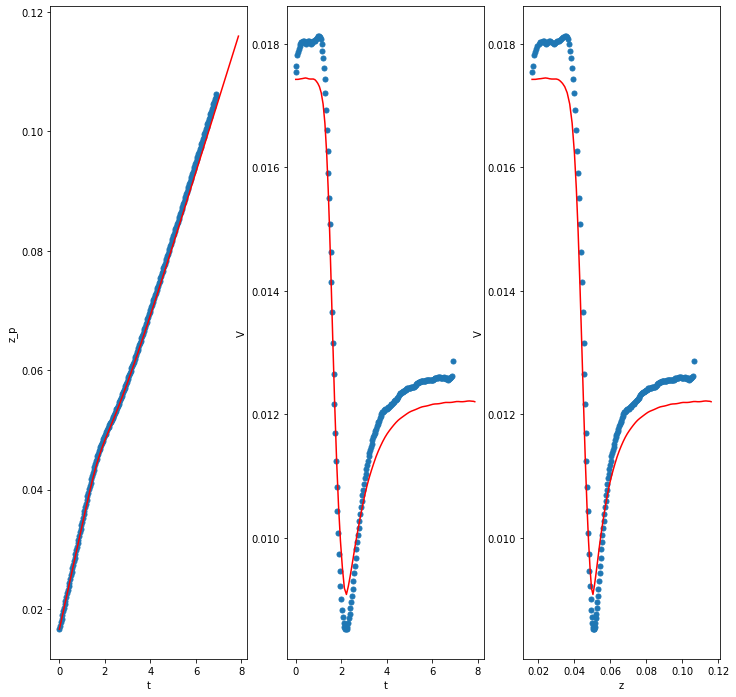

In [7]:
# np.warnings.filterwarnings('error', category=np.VisibleDeprecationWarning)
# np.seterr(all="raise")

options = {'reltol':1e-6,'abstol':1e-6}

fig, ax = plt.subplots(1,3,figsize=(12,12))


# manually rewriting the single particle conditions

# n_particles = 


for i in range(n_particles):

    if i != n_particles-1:
        continue
     
    # name_to_disp=['trajP',num2str(i)]
    # disp(name_to_disp)
    
    # Read data particle from measurements 
    rhop   = data['rhop'][0][i].flatten()             # particle density              [kg/m3]
    d      = data['d'][0][i].flatten()                # particle diameter             [m]
    z_exp  = data['z'][0][i].flatten()                # particle z-position           [m]
    vz_exp = data['vz'][0][i].flatten()               # particle vertical velocity    [m/s]
    t_exp  = data['time'][0][i].flatten()             # time                          [s]
    t0 = t_exp[0]                                     # initial time                  [s]
    z0 = z_exp[0]                                     # particle initial position     [m]
    tend = t_exp[-1] 
        
    #z0 = 0; #% initial position [m]
    # tend = 10; #% simulation duration [s]
    # d    = 8.91e-4; #% particle diameter [m]
    # g = 9.81; #% gravitational acceleration [m/s2]
    # zu = 0.037; #% upper limit of the interface (entrance) [m]
    # zl = 0.05; #% bottom limit of the interface (exit) [m]
    # rho1 = 976; #% density top layer [kg/m3]
    # rho2 = 1025; #% density bottom layer [kg/m3]
    # nu1 = 1.43e-6; #% viscosity top layer [m2/s]
    # nu2 = 1.012e-6; #% viscosity bottom layer [m2/s]
    # rhop = 1077;    #% particle density [kg/m3]
    # lam=0.35;
    # flag=1;                                 # final time                    [s]
    
    # Calculate the trajectory and plot the results
    t, zp, V = f_particle(z0, tend, rhop, d, g, zu, zl, rho1, rho2, nu1, nu2, lam, options)

    ax[0].plot(t_exp-t0,z_exp,'.',markersize=10)
    ax[0].plot(t,zp,'r',lw=1.5)
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('z_p')
    
    ax[1].plot(t_exp - t0, vz_exp, '.',markersize=10)
    ax[1].plot(t,V,'r',lw=1.5)
    ax[1].set_xlabel('t')
    ax[1].set_ylabel('V')
    
    ax[2].plot(z_exp,vz_exp,'.',markersize=10)
    ax[2].plot(zp,V,'r',lw=1.5)
    ax[2].set_xlabel('z')
    ax[2].set_ylabel('V')

In [8]:
d,rhop

(array([0.000891]), array([1077.9191]))

In [9]:
data['d'][0].squeeze()

array([array([[0.000839]]), array([[0.00092]]), array([[0.000945]]),
       array([[0.000878]]), array([[0.000914]]), array([[0.000852]]),
       array([[0.000859]]), array([[0.000919]]), array([[0.000918]]),
       array([[0.000915]]), array([[0.000896]]), array([[0.000942]]),
       array([[0.000914]]), array([[0.000907]]), array([[0.000896]]),
       array([[0.000893]]), array([[0.000908]]), array([[0.000891]])],
      dtype=object)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc5fac39-9762-485a-b44f-401e8d3ea15e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>